In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from lbn import LBN, LBNLayer
from sklearn.model_selection import train_test_split
from tensorflow import keras  
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout 
from tensorflow.keras.layers import Activation 
from tensorflow.keras.layers import LeakyReLU  
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.client import device_lib


In [2]:
df2variables = [    'tau_0_E','tau_0_Px','tau_0_Py', 'tau_0_Pz',
                    'lep_0_E','lep_0_Px','lep_0_Py','lep_0_Pz',
                    'bjet_0_E','bjet_0_Px','bjet_0_Py','bjet_0_Pz',
                    'met_E', 'met_Px','met_Py', 'met_Pz',
                    'jet_0_E','jet_0_Px','jet_0_Py','jet_0_Pz',
                    'jet_1_E', 'jet_1_Px', 'jet_1_Py', 'jet_1_Pz',
                    'class_label']

In [3]:
df2 = pd.read_csv('EPxPyPz.csv', header=None, names=df2variables)
df2

,tau_0_E,tau_0_Px,tau_0_Py,tau_0_Pz,lep_0_E,lep_0_Px,lep_0_Py,lep_0_Pz,bjet_0_E,bjet_0_Px,...,met_Pz,jet_0_E,jet_0_Px,jet_0_Py,jet_0_Pz,jet_1_E,jet_1_Px,jet_1_Py,jet_1_Pz,class_label
0,36.553666,-29.165498,-19.011040,-11.141122,21.390974,3.425496,47.384285,-35.876886,38.141930,-1.223022,...,0.0,104.280615,15.527517,-76.067417,-68.747223,0.0,25.273267,0.0,0.0,1.0
1,117.187997,89.148620,-41.041988,64.039874,-54.726424,-72.815231,-18.457950,-7.763543,130.244883,-53.356551,...,0.0,144.085449,-52.774976,-126.380736,-42.209686,0.0,70.219318,0.0,0.0,1.0
2,243.011801,156.880646,-27.624827,183.521299,-204.676655,-41.323151,18.359706,-39.405644,204.676655,-13.014949,...,0.0,204.676655,-13.014949,-186.464211,82.134824,0.0,121.618194,0.0,0.0,1.0
3,145.974976,-40.080426,70.531011,-121.357445,-118.946446,73.472068,-61.114372,-71.763554,238.458496,45.939602,...,0.0,545.916366,-104.721268,84.689492,-528.896722,0.0,130.222413,0.0,0.0,1.0
4,130.586211,26.636359,-69.311486,107.420579,-64.557645,-30.880374,-7.971840,177.343715,64.557645,-55.315097,...,0.0,64.557645,-55.315097,-21.743958,22.861578,0.0,53.924404,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7428,113.056460,-25.976380,35.579702,-104.120486,-69.770719,-57.552105,-4.063886,-36.646056,138.120587,40.151658,...,0.0,138.120587,40.151658,-101.489306,-82.805100,0.0,0.000000,0.0,0.0,0.0
7429,35.126350,-33.506106,-6.179581,8.544828,276.658221,-88.029132,137.653409,-294.789010,60.385041,-21.113074,...,0.0,60.385041,-21.113074,53.771724,-16.590442,0.0,0.000000,0.0,0.0,1.0
7430,140.716003,73.434103,-4.622980,119.946047,-226.236410,-14.997524,-26.571417,-8.615940,226.236410,25.637152,...,0.0,226.236410,25.637152,-87.001345,-207.066554,0.0,0.000000,0.0,0.0,1.0
7431,59.333343,-14.377494,-29.145287,49.641571,-77.785994,-49.018382,15.250505,51.416802,77.785994,42.396560,...,0.0,288.766637,65.346953,-5.716435,281.039347,0.0,55.620389,0.0,0.0,0.0


In [4]:
df2['tau_0_E'].loc[df2.index[0]]

36.553665806146434

In [5]:
EPxPyPz_vectors = []
for i in df2.index:
    event = []
    tau_0 = [ df2['tau_0_E'].loc[df2.index[i]], df2['tau_0_Px'].loc[df2.index[i]], df2['tau_0_Py'].loc[df2.index[i]], df2['tau_0_Pz'].loc[df2.index[i]] ]  
    lep_0 = [ df2['lep_0_E'].loc[df2.index[i]], df2['lep_0_Px'].loc[df2.index[i]], df2['lep_0_Py'].loc[df2.index[i]], df2['lep_0_Pz'].loc[df2.index[i]] ] 
    bjet_0 = [ df2['bjet_0_E'].loc[df2.index[i]], df2['bjet_0_Px'].loc[df2.index[i]], df2['bjet_0_Py'].loc[df2.index[i]], df2['bjet_0_Pz'].loc[df2.index[i]] ] 
    met = [ df2['met_E'].loc[df2.index[i]], df2['met_Px'].loc[df2.index[i]], df2['met_Py'].loc[df2.index[i]], df2['met_Pz'].loc[df2.index[i]] ] 
    jet_0 = [ df2['jet_0_E'].loc[df2.index[i]], df2['jet_0_Px'].loc[df2.index[i]], df2['jet_0_Py'].loc[df2.index[i]], df2['jet_0_Pz'].loc[df2.index[i]] ] 
    jet_1 = [ df2['jet_1_E'].loc[df2.index[i]], df2['jet_1_Px'].loc[df2.index[i]], df2['jet_1_Py'].loc[df2.index[i]], df2['jet_1_Pz'].loc[df2.index[i]] ] 
    event.append(tau_0)
    event.append(lep_0)
    event.append(bjet_0)
    event.append(met)
    event.append(jet_0)
    event.append(jet_1)
    EPxPyPz_vectors.append(event)

LBN_input_vectors = np.array(EPxPyPz_vectors)   


In [6]:
print("{} \tEvents\n{} \tParticles per Event\n{} \tVector Components per Particle".format(LBN_input_vectors.shape[0],LBN_input_vectors.shape[1],LBN_input_vectors.shape[2]))
print("\nDimension of LBN_input_vectors:\n{}".format(LBN_input_vectors.shape))

7433 	Events
6 	Particles per Event
4 	Vector Components per Particle

Dimension of LBN_input_vectors:
(7433, 6, 4)


In [7]:
N_Train = 5000
N_Max = 7433

Train_Sample=df2[:N_Train]
Test_Sample=df2[N_Train:N_Max]


X_Train=LBN_input_vectors[:N_Train]
Y_Train=np.array(Train_Sample["class_label"])

X_Test=LBN_input_vectors[N_Train:N_Max]
Y_Test=np.array(Test_Sample["class_label"])

In [8]:
Keras_model = Sequential()
input_shape = (6, 4)
Keras_model.add(LBNLayer(input_shape, 13, boost_mode=LBN.PAIRS))
Keras_model.add(BatchNormalization())
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(1,activation="sigmoid"))

In [9]:
Keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LBN (LBNLayer)               (None, 52)                156       
_________________________________________________________________
batch_normalization (BatchNo (None, 52)                208       
_________________________________________________________________
dense (Dense)                (None, 64)                3392      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4

In [10]:
Keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=Keras_model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=100, batch_size=50)

Epoch 1/100
100/100 [==============================] - 9s 28ms/step - loss: 0.7011 - accuracy: 0.5676 - val_loss: 0.6797 - val_accuracy: 0.5832
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 0.6370 - accuracy: 0.6420 - val_loss: 0.5997 - val_accuracy: 0.6732
Epoch 3/100
100/100 [==============================] - 1s 8ms/step - loss: 0.4939 - accuracy: 0.7784 - val_loss: 0.4871 - val_accuracy: 0.7863
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.4754 - accuracy: 0.7832 - val_loss: 0.4664 - val_accuracy: 0.7891
Epoch 5/100
100/100 [==============================] - 1s 8ms/step - loss: 0.4732 - accuracy: 0.7896 - val_loss: 0.4569 - val_accuracy: 0.7970
Epoch 6/100
100/100 [==============================] - 1s 8ms/step - loss: 0.4663 - accuracy: 0.7866 - val_loss: 0.4634 - val_accuracy: 0.7867
Epoch 7/100
100/100 [==============================] - 1s 8ms/step - loss: 0.4737 - accuracy: 0.7762 - val_loss: 0.4625 - val_accuracy: 0.797

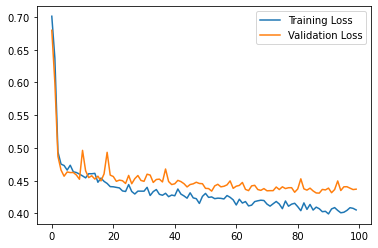

In [11]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

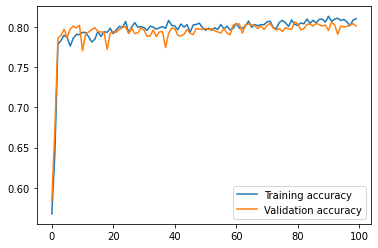

In [12]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

In [13]:
scores = Keras_model.evaluate(X_Test, Y_Test)
print(scores)

77/77 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.8011
[0.4371296763420105, 0.8010686635971069]


In [14]:
Keras_model.predict(X_Test)

array([[0.11384094],
       [0.9575377 ],
       [0.16430959],
       ...,
       [0.9692857 ],
       [0.03593364],
       [0.78461766]], dtype=float32)

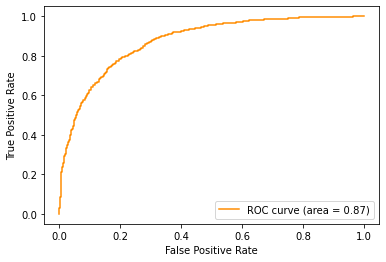

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_Test, Keras_model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()